In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from xmitgcm import open_mdsdataset 
from xhistogram.xarray import histogram

In [3]:
from matplotlib import animation

In [9]:
data_dir = "/pool001/xruan/RT_canyon_hydrostatic/diag/"
grid_dir = "/pool001/xruan/RT_canyon_hydrostatic/input/"
ds = open_mdsdataset(data_dir, grid_dir = grid_dir, iters=140040, ignore_unknown_vars=True, prefix=["TS_inst", "vel_inst"], delta_t = 15.)
tr = open_mdsdataset(data_dir, grid_dir = grid_dir, iters=140040, ignore_unknown_vars=True, prefix=["tracer_inst"], delta_t = 15.)

/home/hdrake/.conda/envs/rockall/lib/python3.10/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in /pool001/xruan/RT_canyon_hydrostatic/diag/ or /pool001/xruan/RT_canyon_hydrostatic/input/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "
/home/hdrake/.conda/envs/rockall/lib/python3.10/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in /pool001/xruan/RT_canyon_hydrostatic/diag/ or /pool001/xruan/RT_canyon_hydrostatic/input/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


In [10]:
ds

<xarray.Dataset>
Dimensions:  (time: 1, XC: 700, YC: 1200, XG: 700, YG: 1200, Z: 300, Zp1: 301,
              Zu: 300, Zl: 300)
Coordinates: (12/32)
    iter     (time) int64 140040
  * time     (time) timedelta64[ns] 24 days 07:30:00
  * XC       (XC) >f4 -12.15 -12.15 -12.15 -12.15 ... -11.8 -11.8 -11.8 -11.8
  * YC       (YC) >f4 54.1 54.1 54.1 54.1 54.1 ... 54.46 54.46 54.46 54.46 54.46
  * XG       (XG) >f4 -12.15 -12.15 -12.15 -12.15 ... -11.8 -11.8 -11.8 -11.8
  * YG       (YG) >f4 54.1 54.1 54.1 54.1 54.1 ... 54.46 54.46 54.46 54.46 54.46
    ...       ...
    maskC    (Z, YC, XC) bool dask.array<chunksize=(300, 1200, 700), meta=np.ndarray>
    maskW    (Z, YC, XG) bool dask.array<chunksize=(300, 1200, 700), meta=np.ndarray>
    maskS    (Z, YG, XC) bool dask.array<chunksize=(300, 1200, 700), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(1200, 700), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(1200, 700), meta=np.ndarray>
    maskInW  (YC, XG) bool dask.array<chunksize=(1200, 700), meta=np.ndarray>
Data variables:
    THETA    (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 300, 1200, 700), meta=np.ndarray>
    SALT     (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 300, 1200, 700), meta=np.ndarray>
    UVEL     (time, Z, YC, XG) >f4 dask.array<chunksize=(1, 300, 1200, 700), meta=np.ndarray>
    VVEL     (time, Z, YG, XC) >f4 dask.array<chunksize=(1, 300, 1200, 700), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir='/pool001/xrua...

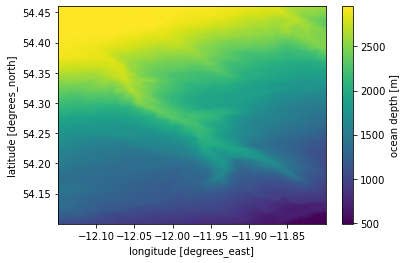

In [14]:
ds['Depth'].plot()

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

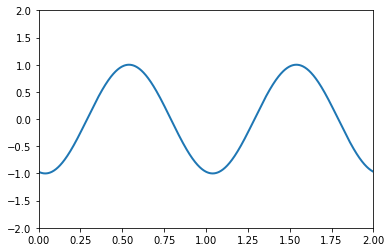

In [27]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=30, blit=True)

anim.save('basic_animation.mp4', fps=30)

plt.show()

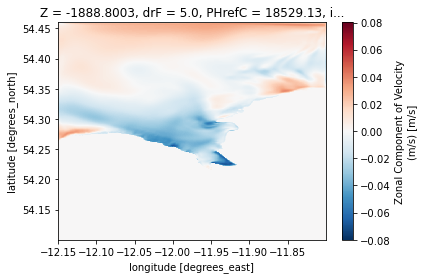

In [17]:
ds['UVEL'].isel(time=-1).isel(Z=180).plot()

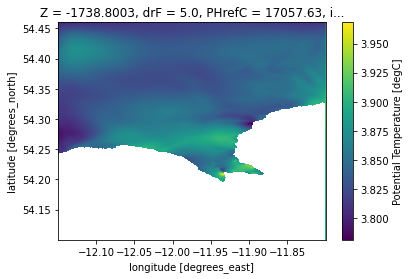

In [9]:
ds['THETA'].where(ds['THETA']!=0.).isel(time=-1).isel(Z=180).plot()

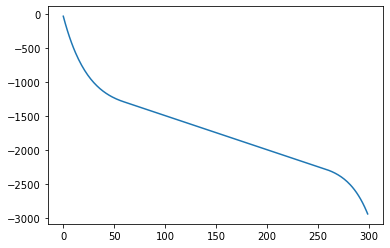

In [13]:
import matplotlib.pyplot as plt
plt.plot(ds['Z'])